### Customer segmentation analsis with python

In [1]:
# Import the analysis libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data Preprocessing

In [4]:
df.shape

(200, 5)

Data has 200 rows and 5 columns

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data is clean, it has no null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


all columns and variables have their appropriate data type

In [7]:
# CustomerID is not necessary, so it is nor needed
df.drop("CustomerID", inplace = True, axis = 1)

#### Data Analysis

In [8]:
# check for statistical analysis
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


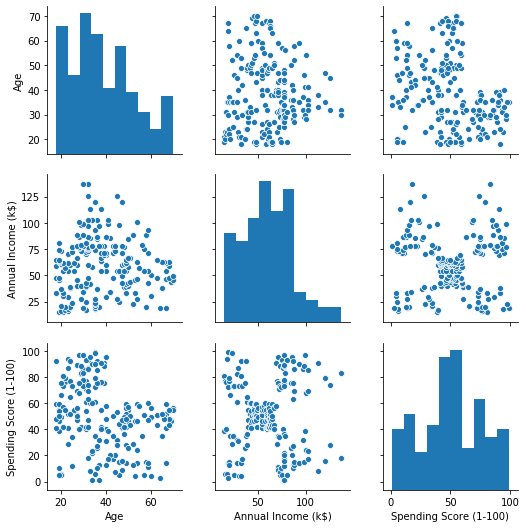

In [9]:
# Take a general visualization of the data
sns.pairplot(df, kind = "scatter")

We can tell from this general plot that there are more of clusters in this data set

* #### Univariate Analysis

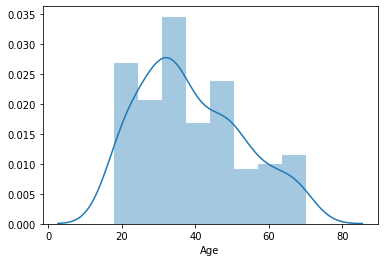

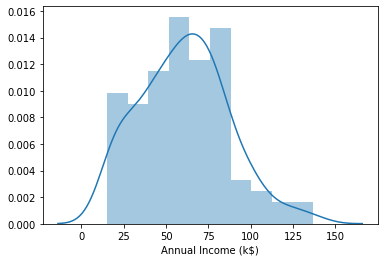

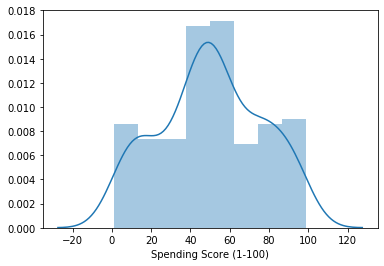

In [10]:
# Create a a histogram to look at annual spending and spending score
column = df.drop("Gender", axis = 1).columns
for i in column:
    sns.distplot(df[i])
    plt.show()

We can see that all 3 parameters are have normal distribution with age been concentrated around 40-60 

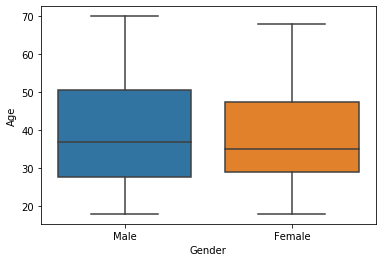

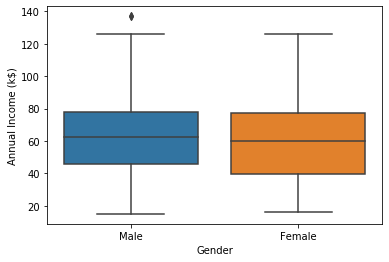

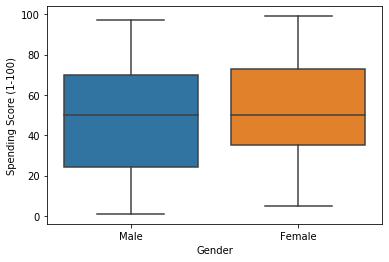

In [11]:
for i in column:
    plt.show()
    sns.boxplot(data = df, x="Gender", y=df[i])

from the box plot, the male Age range is higher than the female, the male are aged between 29-60 while the female is between 30 to 41,the income for the male is betwwen 45-79 while female is between 38 to 79. the male gender has a flier indicating there are some male who earn more than the female but within range, they both have same maximum income with the female been more in data than the male. the female gender has higher spending score compared to the male gender.

we need to check which gender frequently shops i.e check for the number of male and female

In [12]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

well from here, we have more female freqently coming into the male than male

* #### Bivariate analysis

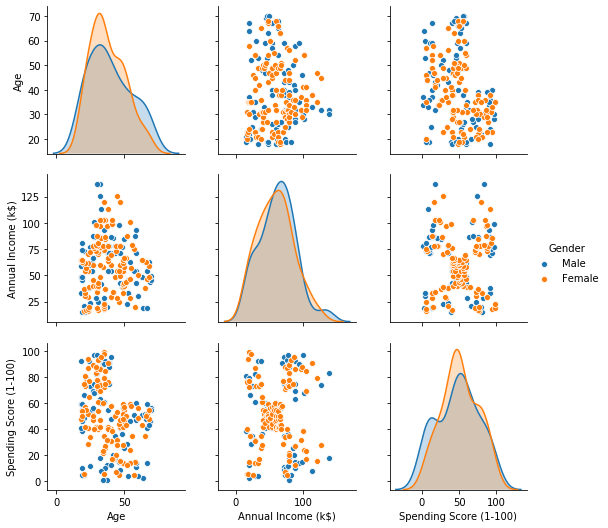

In [13]:
sns.pairplot(data = df, hue = "Gender")

we can see that the annual income and spending score have a well defined clusters comparing to the other ones which is not that well defined, so we take a look at the annual income and spending score

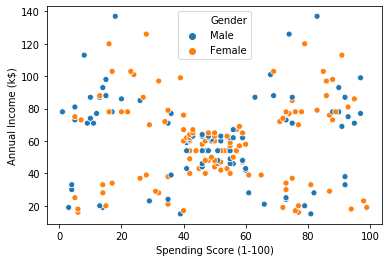

In [14]:
sns.scatterplot(data = df, y = 'Annual Income (k$)', x = 'Spending Score (1-100)', hue = "Gender")

About five to six clusters clusters can be seen from this plot

In [40]:
#check the mean value by  gender
df_avg = df.groupby("Gender").mean()
df_avg

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Text(0.5, 1.0, 'Average annual income')

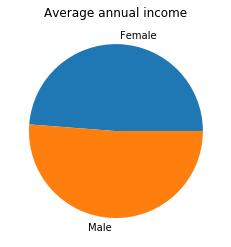

In [47]:
plt.pie(data = df_avg, labels = ["Female", "Male"], x = "Annual Income (k$)");
plt.title("Average annual income")

Text(0.5, 1.0, 'Average spending score')

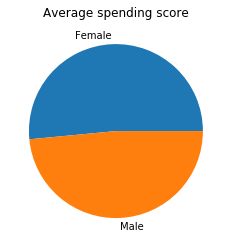

In [48]:
plt.pie(data = df_avg, labels = ["Female", "Male"], x = "Spending Score (1-100)");
plt.title("Average spending score")

In [16]:
df.groupby("Gender")["Annual Income (k$)"].sum()

Gender
Female    6636
Male      5476
Name: Annual Income (k$), dtype: int64

In [36]:
df_sum = df.groupby("Gender")["Annual Income (k$)"].sum()

In [37]:
df_sum = pd.DataFrame(df_avg)
df_sum

,Annual Income (k$)
Gender,
Female,6636
Male,5476


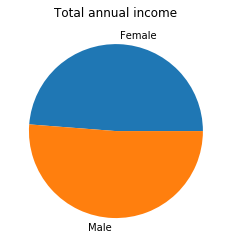

In [50]:
plt.pie(data = df_avg, x = "Annual Income (k$)", labels = ["Female ", "Male"])
plt.title("Total annual income");

The sum of the annual income for the female is higher than the sum of the annual income for the male, but the average annual income for the male is higher than the female, this is because there are more female who show up in the shopping mall than male i.e there is more record of the female gender, but the male have higher earnings/income and there are few records of men coming to the shoping mall which is the reason behind the female having a higher sum total of higher annual income

* #### Conclusion

In conclusion, we can say that the female gender with the average of 38 tend to spend more than the male gender and the male Gender even though the male earn more than the female. so some strategies can be developed to bring in more male to purchase at the mall since the male gender has such higer earnings than the male and also some strategies can be developed to maintain the female customers since they have such high score. 